In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0).....(6,6,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2) * 3.75

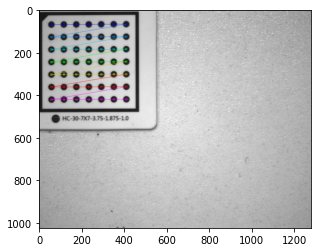

In [2]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in read world space
imgpoints = [] # 2d points in image plane

images = glob.glob('*.bmp')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, circles = cv2.findCirclesGrid(gray, (7,7), flags = cv2.CALIB_CB_SYMMETRIC_GRID)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(circles)

        # Draw and display the circles
        cv2.drawChessboardCorners(img, (7,7), circles, ret)
        plt.imshow(img, cmap='gray')
        
ret, mtx, dist, rvec, tvec = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [3]:
data = {"camera_matrix": mtx.tolist(), "dist_coeff": dist.tolist()}
fname = "camera_calibration.json"
import json
with open(fname, "w") as f:
    json.dump(data, f)

In [397]:
fname = "camera_calibration.json"
import json
with open(fname) as f:
    data = json.load(f)
mtx = np.asarray(data['camera_matrix'])
dist = np.asarray(data['dist_coeff'])

In [355]:
img = cv2.imread('./w/w1.bmp')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

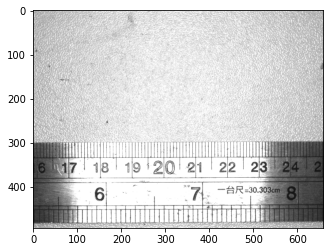

In [356]:
plt.imshow(img, cmap='gray')

In [357]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('./w/w1_calibresult.bmp',dst)
plt.imshow(dst, cmap='gray')

In [358]:
img = cv2.imread('./w/w2.bmp')
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('./w/w2_calibresult.png',dst)
plt.imshow(dst, cmap='gray')

In [359]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvec[i], tvec[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print ("total error: " , mean_error/len(objpoints))

total error:  0.0035127796991053345


In [360]:

import sys


# with open('./calib/calibration.yaml') as f:
#     loadeddict = yaml.load(f)
# camera_matrix = loadeddict.get('camera_matrix')
# dist_coeffs = loadeddict.get('dist_coeff')

tnsPoints = np.zeros((19, 3)) 
tnsPoints[0]  = (0 , 0  , 0)
tnsPoints[1]  = (0 , 137.16 , 0)
tnsPoints[2]  = (0 , 548.64, 0)
tnsPoints[3]  = (0 , 960.12, 0)
tnsPoints[4]  = (0 , 1097.28 , 0)
tnsPoints[5]  = (548.64, 137.16, 0)
tnsPoints[6]  = (548.64, 548.64, 0)
tnsPoints[7]  = (548.64, 960.12, 0)
tnsPoints[8]  = (1188.72 , 0, 0)
tnsPoints[9]  = (1188.72 , 137.16, 0)
tnsPoints[10]  = (1188.72 , 548.64, 0)
tnsPoints[11]  = (1188.72 , 960.12, 0)
tnsPoints[12]  = (1188.72 , 1097.28, 0)
tnsPoints[13]  = (1828.80 , 137.16, 0)
tnsPoints[14]  = (1828.80 , 548.64, 0)
tnsPoints[15]  = (1828.80 , 960.12, 0)
tnsPoints[16]  = (2377.44 , 0  , 0)
tnsPoints[17]  = (2377.44 , 137.16  , 0)
tnsPoints[18]  = (2377.44 , 548.64  , 0)

imPoints = np.zeros((19,2))
imPoints[0] = (302,158)
imPoints[1] = (326, 156)
imPoints[2] = (398, 154)
imPoints[3] = (471, 150)
imPoints[4] = (494, 148)
imPoints[5] = (319, 172)
imPoints[6] = (406, 170)
imPoints[7] = (491, 167)
imPoints[8] = (270, 206)
imPoints[9] = (306, 206)
imPoints[10] = (421, 203)
imPoints[11] = (532, 197)
imPoints[12] = (570, 195)
imPoints[13] = (283, 266)
imPoints[14] = (446, 260)
imPoints[15] = (607, 252)
imPoints[16] = (146, 390)
imPoints[17] = (235, 387)
imPoints[18] = (499, 374)

retval, rvec, tvec = cv2.solvePnP(tnsPoints, imPoints, np.asarray(mtx),         np.asarray(dist))
rotMat,_ = cv2.Rodrigues(rvec)

# After getting the rotation and translation vectors, I need this script to take
# in pixel coordinates and output 3D object point coordinates with Z = 0
#
# For the bounty, it is enough to have the script so that any hardcoded pixel
# coordinates are used as an example to print out the corresponding (X, Y, 0) 
# real world coordinate
inPoints = np.zeros((3, 3))
inPoints[0]  = (0 , 0 , 0)
inPoints[1]  = (0 , 548.64 , 0)
inPoints[2]  = (548.64 , 548.64, 0)

outPoints, jacobian = cv2.projectPoints(inPoints, rvec, tvec, np.asarray(mtx), np.asarray(dist))


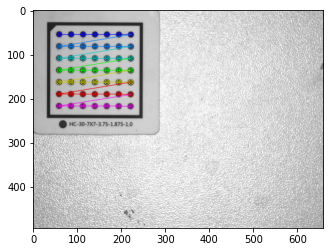

In [361]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in read world space
imgpoints = [] # 2d points in image plane
fname = '2.bmp'
img1 = cv2.imread(fname)
img = img1.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, circles = cv2.findCirclesGrid(gray, (7,7), flags = cv2.CALIB_CB_SYMMETRIC_GRID)
if ret == True:
    objpoints.append(objp)
    imgpoints.append(circles)

    # Draw and display the circles
    cv2.drawChessboardCorners(img, (7,7), circles, ret)
    plt.imshow(img, cmap='gray')


In [362]:
retval, rvec, tvec = cv2.solvePnP(objpoints[0], np.asarray(imgpoints[0].tolist()).reshape(49,2), np.asarray(mtx),         np.asarray(dist))
rotMat,_ = cv2.Rodrigues(rvec)

In [363]:
inPoints = np.zeros((4, 3))
inPoints[0]  = (-10 , 0 , 0)
inPoints[1]  = (30 , 0 , 0)
inPoints[2]  = (0, -10, 0)
inPoints[3]  = (0, 30, 0)
outPoints, jacobian = cv2.projectPoints(inPoints, rvec, tvec, np.asarray(mtx), np.asarray(dist))

In [364]:
# Draw a diagonal blue line with thickness of 5 px
cv2.arrowedLine(img,(int(outPoints[0][0][0]),int(outPoints[0][0][1])),(int(outPoints[1][0][0]),int(outPoints[1][0][1])),(0,0,255),3)
cv2.arrowedLine(img,(int(outPoints[2][0][0]),int(outPoints[2][0][1])),(int(outPoints[3][0][0]),int(outPoints[3][0][1])),(255,0,0),3)
plt.imshow(img)

In [369]:
mtx

array([[4.41286265e+03, 0.00000000e+00, 3.46680323e+02],
       [0.00000000e+00, 4.41482442e+03, 2.53316636e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [379]:
np.linalg.inv(mtx)

array([[ 2.26610271e-04,  0.00000000e+00, -7.85613219e-02],
       [ 0.00000000e+00,  2.26509574e-04, -5.73786433e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [371]:
dist

array([[-3.45876578e-01,  1.05314306e+01, -2.23742305e-03,
        -1.78728100e-03, -5.55604565e-01]])

In [370]:
rotMat

array([[ 0.99971497, -0.00460167, -0.02342662],
       [ 0.00378038,  0.99938078, -0.0349823 ],
       [ 0.02357309,  0.03488377,  0.99911332]])

In [367]:
rvec

array([[ 0.03494346],
       [-0.02350687],
       [ 0.00419227]])

In [368]:
tvec

array([[-39.88315715],
       [-27.52160054],
       [610.51695913]])

In [393]:
uv_point = np.ones((3,1))
uv_point[0] = 3
uv_point[1] = 134
s = zConst = 0
tempMat = np.linalg.inv(rotMat) * np.linalg.inv(mtx) * uv_point
tempMat2 = np.linalg.inv(rotMat) * tvec
s = zConst + tempMat2[2,0]
s /= tempMat[2,0]
wcPoint = np.linalg.inv(rotMat) * (s * np.linalg.inv(mtx) * uv_point - tvec)

<ipython-input-393-5fe9816d02a4>:8: RuntimeWarning: divide by zero encountered in double_scalars
  s /= tempMat[2,0]
<ipython-input-393-5fe9816d02a4>:9: RuntimeWarning: invalid value encountered in multiply
  wcPoint = np.linalg.inv(rotMat) * (s * np.linalg.inv(mtx) * uv_point - tvec)
